# DAMD hashtag counts

What other hashtags appear in the DAMD data than `#damd`. Which ones are popular, and how are the hashtags distributed?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Read the data, fill in the data file below.

In [2]:
damd = pd.read_csv("", index_col="tweet_id")
damd['hashtags'] = damd['hashtags'].astype(str)
damd.head(3)

,Unnamed: 0,user_id,user_name,reply_to_id,created,message,geodata,place_id,place_type,place_name,place_country,language,retweet_count,hashtags,user_mentions_name,user_mentions_id,urls,media_id,media_type,media_url
tweet_id,,,,,,,,,,,,,,,,,,,,
885401672448589824,1,43302304,Motor Mavens,NaN,Thu Jul 13 07:33:03 +0000 2017,The @oemaudioplus #86Vantage's interior just l...,NaN,NaN,NaN,NaN,NaN,en,0,86Vantage;DAMD,OEM AUDIO PLUS,137555927,http://fb.me/6IdLxl68T,NaN,NaN,NaN
772829925279752196,2,94512824,Caspar de Kiefte,NaN,Mon Sep 05 16:13:07 +0000 2016,#DAMD -&gt; via Kunstenbond onderdeel van inte...,NaN,NaN,NaN,NaN,NaN,nl,0,DAMD,NaN,NaN,http://damd.nl/nieuws/damd-via-kunstenbond-ver...,NaN,NaN,NaN
828122222111764480,3,798400767975686144,Bec,NaN,Sun Feb 05 06:04:58 +0000 2017,@Budah96 @sarahbuya4 #Damd Olivia went and too...,NaN,NaN,NaN,NaN,NaN,en,0,Damd;Damd;Scandal;sogood,Spider-Paco The 🌮;Sarah,165599878;53990004,NaN,NaN,NaN,NaN


First, build an inverse index of hashtags to tweets, as a Python `dict` of the shape.

    {'hashtag1': [tweet_1, tweet_2, ...],
     'hashtag2': [tweet_2, tweet_3, ...],
     ⋮
     }

For this, we will extract the `hashtags` column which is itself a varying length.

In [3]:
hashtags = {}
for (tweet, hashtagsinthistweet) in damd['hashtags'].map(lambda l: l.split(';')).items():
    for hashtag in hashtagsinthistweet:
        hashtag = hashtag.lower()
        if hasthag not in hashtags.keys():
            hashtags[hashtag] = [t]
        else:
            hashtags[hashtag].append(t)

We can remove the `damd` hashtag, since in our data every single item has it, and thus it carries no information.

In [4]:
hashtags.pop('damd'); # semicolon at the end of the line suspends output

Next, build a `pandas.Series` of the number of tweets each hashtag is used in, from the above reverse index.

In [5]:
counts = pd.Series([len(hashtags[h]) for h in hashtags.keys()], name="count", index=hashtags.keys())
counts.describe()

count    803.000000
mean       3.557908
std       14.968465
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max      290.000000
Name: count, dtype: float64

Ok that looks like *long-tailed* distribution. Let's look at a 10 bin histogram.

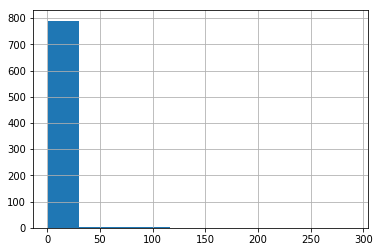

In [6]:
counts.hist()

Let's inspect the topmost hashtags, say those which occur more often than 5 times.

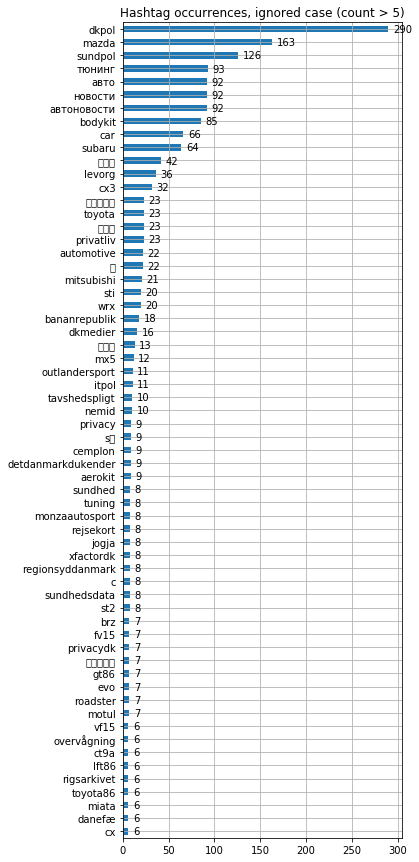

In [7]:
ax = counts.loc[counts > 5].sort_values().plot.barh(grid=True, figsize=(5, 15), title="Hashtag occurrences, ignored case (count > 5)")
for (patch, hashtag) in zip(ax.patches, counts.loc[counts > 5].sort_values()):
    ax.annotate(hashtag, (patch.get_width() + 5, patch.get_y()))